# Analisi correlazione non parametrica
Viene impiegata per analizzare la correlazione tra variabili non linearmente dipendenti che non hanno una ditribuzione normale o che non sono continue.
Per individuare una correlazione non parametrica cha variabili cetegoriche possiamo utilizare:
- l'indice di correlazione di Searman (Spearman's rank correlation)
- il test del Chi-quadrato (Chi-squared Tables)

### Indice di correlazione di Spearman
L'indice di correlazione R per ranghi di Spearman è una misura statistica non parametrica di correlazione. Essa misura il grado di relazione tra due variabili e l'unica ipotesi richiesta è che siano ordinabili, e, se possibile, continue.

Diversamente dal coefficiente di correlazione lineare di Pearson, il coefficiente di Spearman non misura una relazione lineare anche qualora vengano usate misure intervallari. Infatti esso permette di stabilire quanto bene una relazione tra due variabili può essere descritta usando una funzione monotona.

- R =  1 --> Forte correlazione positiva
- R =  0 --> Nessuna correlazione
- R = -1 --> Forte correlazine negativa

### Test del Chi-quadrato
Con test chi quadrato si intende uno dei test di verifica d'ipotesi usati in statistica che utilizzano la distribuzione chi quadrato per decidere se rifiutare o non rifiutare l'ipotesi nulla. A seconda degli assunti di partenza usati tali test vengono considerati parametrici o non parametrici.
Andremo a verificare la presenza di una correlazione tra due variabili assumendo una ipotesi nulla di correlazione.
A seconda dei valori assunti consideremo valida o no l'ipotesi nulla:
- <b>p < 0.05 --> L'ipotesi nulla viene rigettata e si può concludere che le variabili sono correlate.</b>
- p > 0.05 --> Accettiamo li'ipotesi nulla e concludiamo che le variabili sono indipendenti.

Per il test del chi-quadrato dobbiamo utilizzare variabili categoriche o numeriche (purchè siamo raggruppare in categorie).

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams


In [2]:
# Set the jupyter notebook
%matplotlib inline
rcParams["figure.figsize"]=14,7
plt.style.use("seaborn-darkgrid")

In [3]:
# Load dataset
address = "./Data/mtcars.csv"
cars = pd.read_csv(address)
cars.rename(columns = {"Unnamed: 0": "car_name"}, inplace = True)
cars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


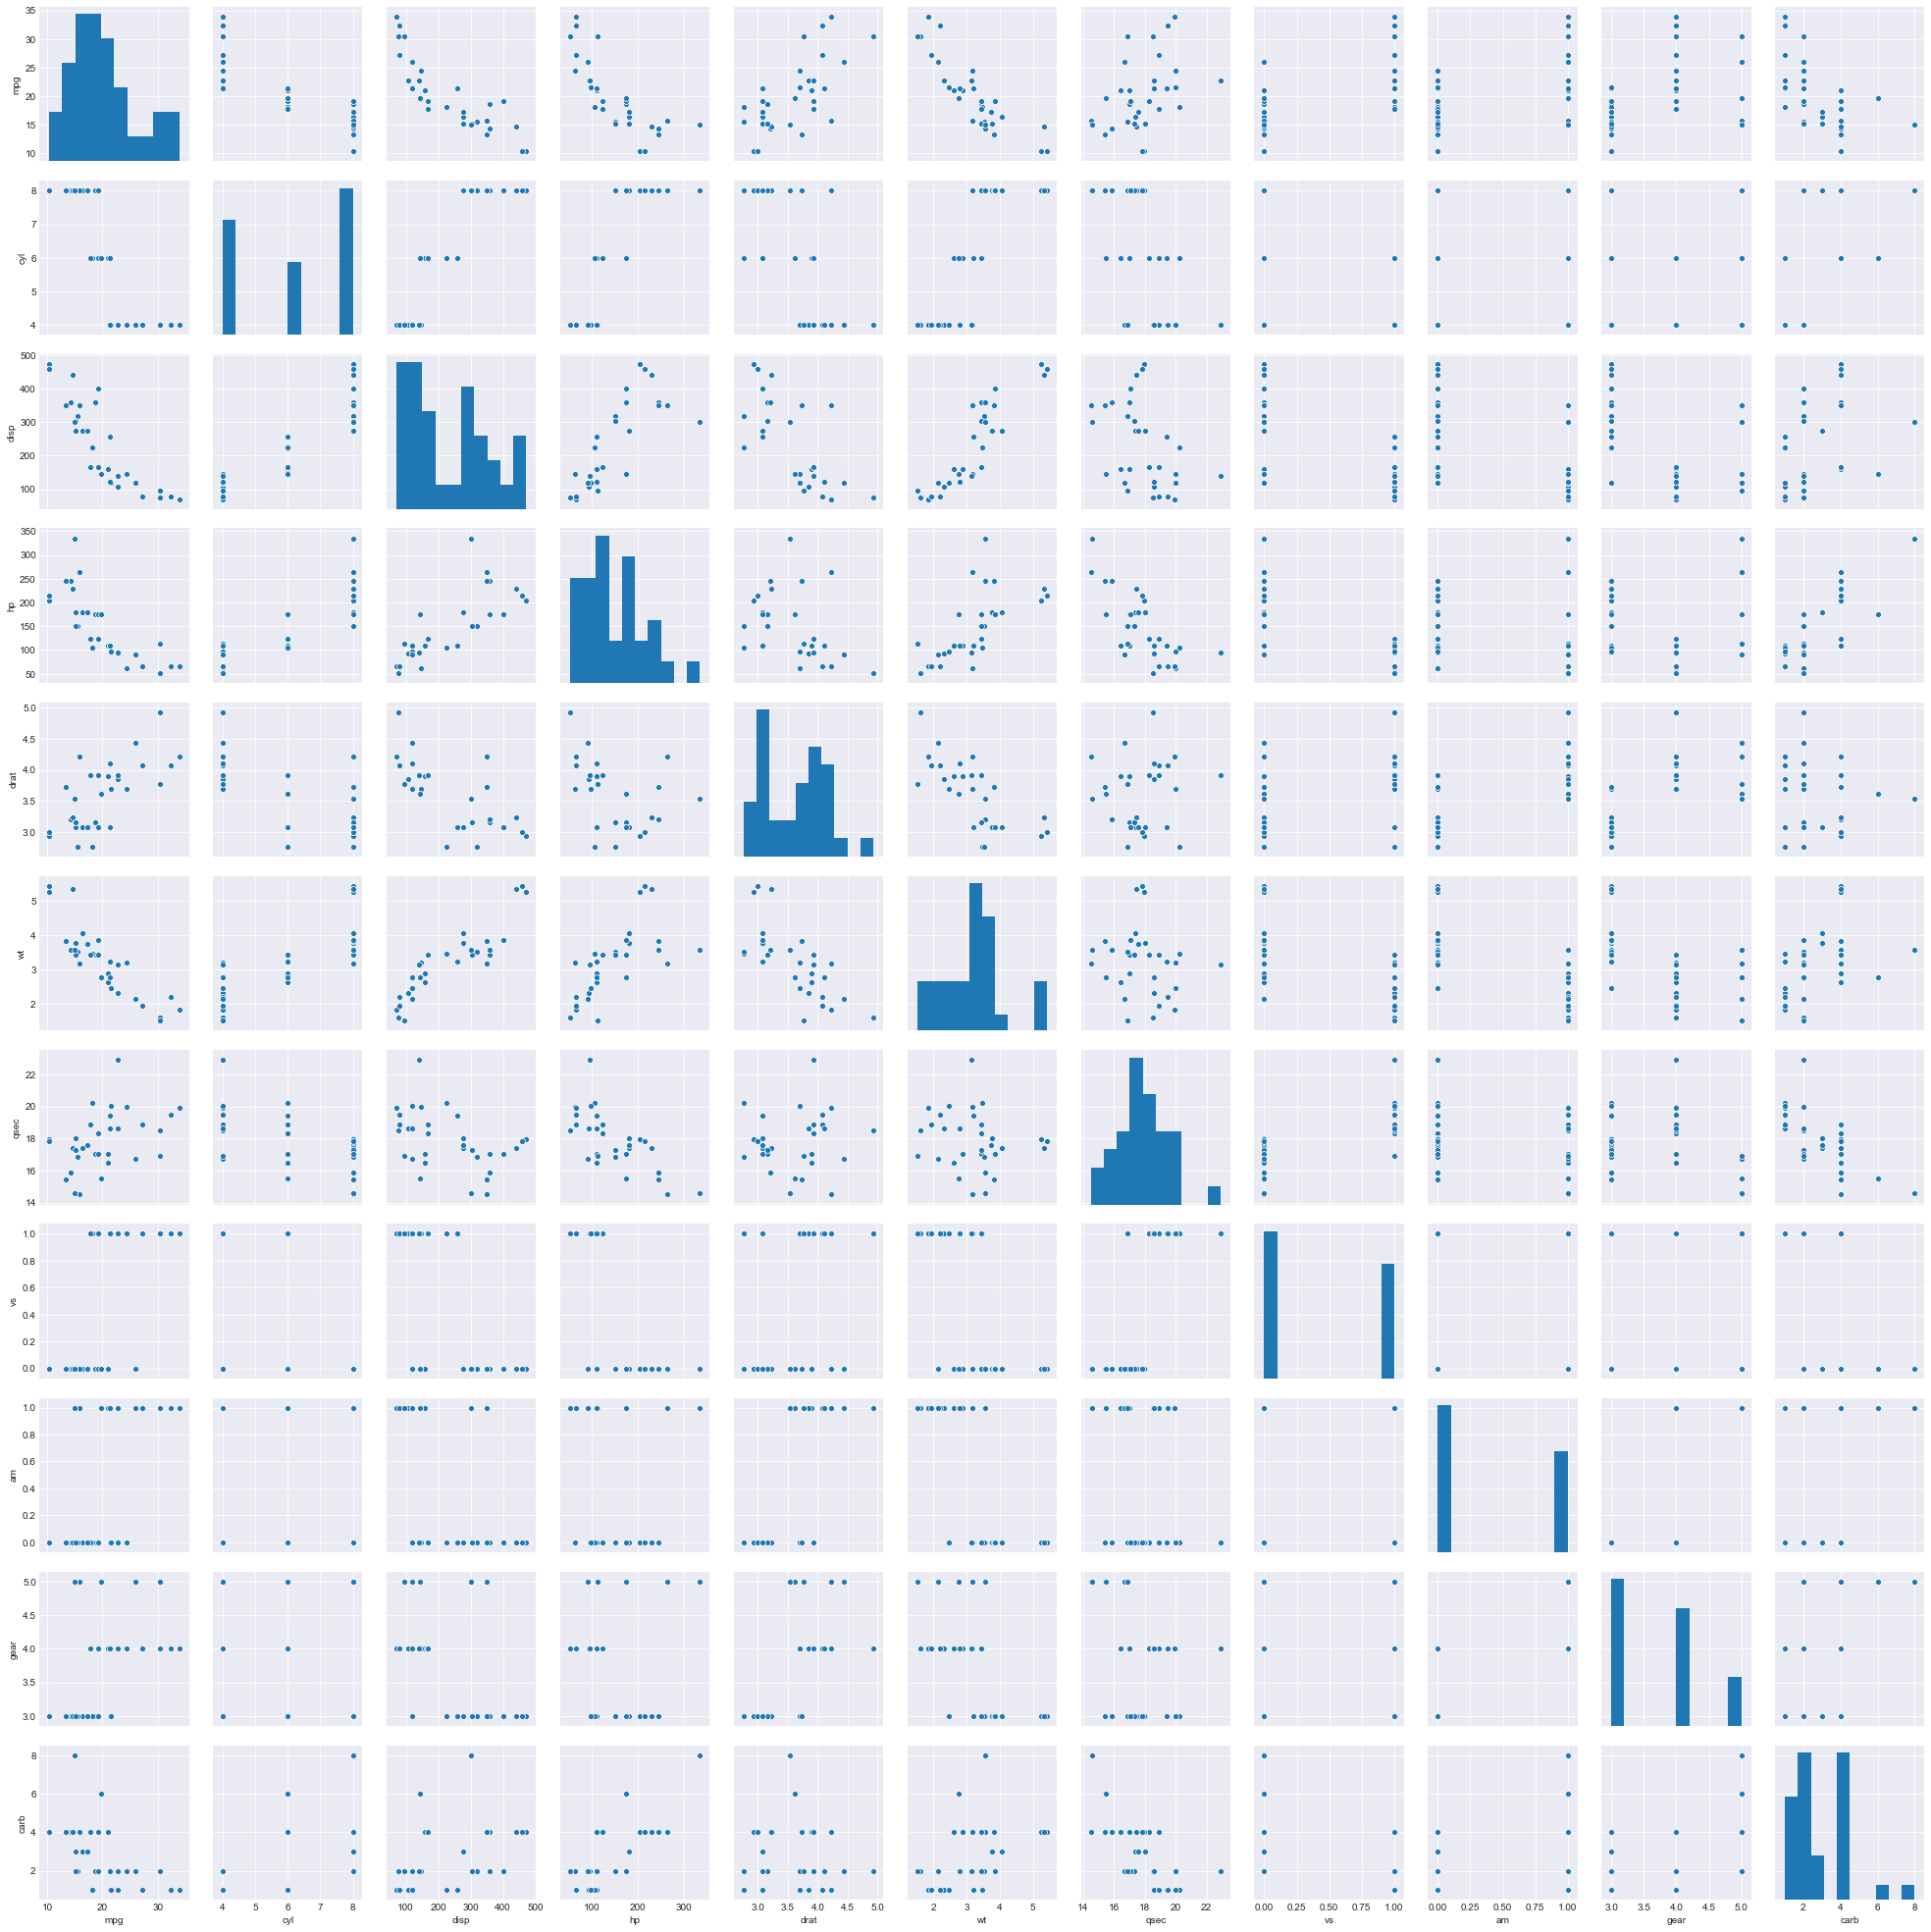

In [4]:
sb.pairplot(cars)

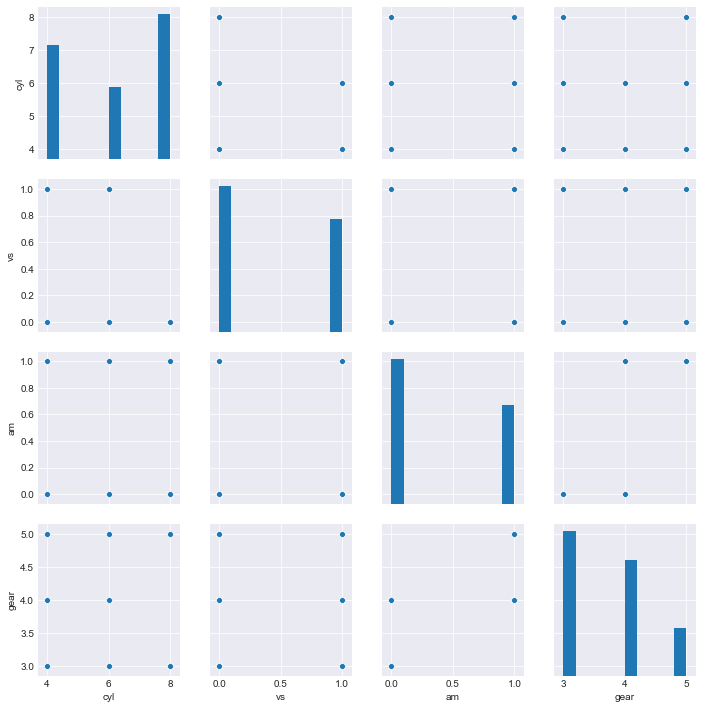

In [5]:
# Choose some variable
x = cars[["cyl", "vs","am","gear",]]
sb.pairplot(x)

Tutte le variabili scelte per il subset x sono variabili numeriche che possono essere ordinate e che possono assume solo alcuni valori ben definiti, non sono quindi delle variabili continue. Inoltre guardando la loro distribuzione di nota che non hanno una distribuzione normale.
<b>Quindi se esiste un qualche tipo di relazione non sarà una relazione lineare. </b>

In [19]:
cyl = cars.cyl
vs = cars.vs
gear = cars.gear
am = cars.am

spear, p_value = spearmanr(cyl , vs)
print(f"Spearman coefficient: {round(spear,3)}\nP Value: {round(p_value,3)}")


spear, p_value = spearmanr(cyl , am)
print(f"Spearman coefficient: {round(spear,3)}\nP Value: {round(p_value,3)}")


spear, p_value = spearmanr(cyl , gear)
print(f"Spearman coefficient: {round(spear,3)}\nP Value: {round(p_value,3)}")

spear, p_value = spearmanr(am , vs)
print(f"Spearman coefficient: {round(spear,3)}\nP Value: {round(p_value,3)}")

Spearman coefficient: -0.814
P Value: 0.0
Spearman coefficient: -0.522
P Value: 0.002
Spearman coefficient: -0.564
P Value: 0.001
Spearman coefficient: 0.168
P Value: 0.357


In [18]:
table = pd.crosstab(cyl, am)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-quadrato: {round(chi2,3)}\nP-value: {round(p,3)}")

Chi-quadrato: 8.741
P-value: 0.013


In [15]:
table = pd.crosstab(cyl, vs)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-quadrato: {round(chi2,3)}\nP-value: {round(p,3)}")

Chi-quadrato: 21.34
P-value: 0.0


In [17]:
table = pd.crosstab(cyl, gear)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-quadrato: {round(chi2,3)}\nP-value: {round(p,3)}")

Chi-quadrato: 18.036
P-value: 0.001


Come abbiamo indicato ad inizio lezione sa abbiamo un P-Value inferiore a 0,05 dobbiamo rigettare l'ipotesi nulla e quindi possiamo supporre che esiste una correlazione tra le variabili.
